In [1]:
import numpy as np
import scipy
import io
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
k =2.*math.pi
L = 1.0
V = 1.291

delx = []
delx2 = []
delx3 = []
dissipation = []
dissipation2 = []
dissipation3 = []
plot = []
plot2 = []
plot3 = []


In [4]:
res = (8, 16, 32, 64)#, 128, 256)#, 512, 1024)
for r in res:
    filename = "../data/magson_GLMrk2_res"+str(r)+".dat"
    f = open(filename, "r")
    dx = 1./float(r)
    delx.append(dx)
    time, ekin, etot = np.loadtxt(filename,usecols=(0,6,7),skiprows=2,unpack=True)
    logekin = [math.log(y) for y in ekin]
    damping,b= np.polyfit(time,logekin,1)
    diss = -2.*damping/k
    dissipation.append(diss)
    plot.append(damping)
    print r, dx, diss


8 0.125 0.0114035263152
16 0.0625 0.00148816065537
32 0.03125 0.00038013258089
64 0.015625 1.07371850315e-05


In [5]:
res = (8, 16)# 32, 64, 128, 256)#, 512, 1024)
for r in res:
    filename = "../data/magson_USM_res"+str(r)+".dat"
    f = open(filename, "r")
    dx = 1./float(r)
    delx2.append(dx)
    time2, ekin2 = np.loadtxt(filename,usecols=(0,6),skiprows=2,unpack=True)
    logekin2 = [math.log(y) for y in ekin2]
    damping,b= np.polyfit(time2,logekin2,1)
    diss = -2.*damping/k
    dissipation2.append(diss)
    plot2.append(damping)
    print r, dx, diss

8 0.125 0.0540881753686
16 0.0625 0.0113275144071


In [6]:
lndelx = [math.log(y) for y in delx]
lndiss = [math.log(x) for x in dissipation]
m,b = np.polyfit(lndelx,lndiss,1)
fit_tot = math.exp(b)*(math.pow(L,(m-1))/V)
print m,fit_tot

lndelx2 = [math.log(y) for y in delx2]
lndiss2 = [math.log(x) for x in dissipation2]
m,b = np.polyfit(lndelx2,lndiss2,1)
fit_tot = math.exp(b)*(math.pow(L,(m-1))/V)
print m,fit_tot

3.21269011686 8.93767999752
2.25548190411 4.56120101409


In [7]:
logdelx = [math.log10(y) for y in delx]
logdiss = [math.log10(y) for y in dissipation]
logdelx2 = [math.log10(y) for y in delx2]
logdiss2 = [math.log10(y) for y in dissipation2]
print logdelx2, logdiss2

[-0.9030899869919435, -1.2041199826559248] [-1.2668976689682285, -1.9458653767822474]


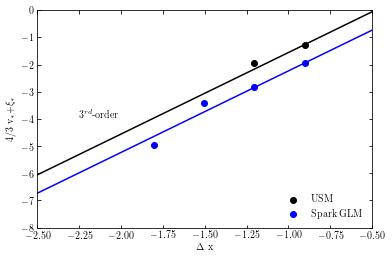

In [13]:
lgdelx = np.linspace(-5,-0.5,20)

plt.figure(1)
plt.xlabel(r'$\Delta$ x')
plt.ylabel(r'4/3 v$_{*}$+$\xi_{*}$')
plt.scatter(logdelx2, logdiss2, color = 'k', label = 'USM')
y = [3.*dx+0.76637 for dx in lgdelx]
plt.plot(lgdelx,y, color = 'b')
plt.scatter(logdelx, logdiss, color = 'b', label = 'Spark GLM')
y = [3.*dx+1.44237 for dx in lgdelx]
plt.plot(lgdelx, y, color = 'k')
plt.legend(loc = 'lower right',frameon = False)
plt.text(-2.25,-4,r'$3^{rd}$-order', color = 'k')
plt.axis([-2.5,-0.5,-8,0])
plt.savefig('magson.pdf', orientation = 'landscape', format = None)
plt.show()
